In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
df = pd.read_csv('habrahabr_scraper/data/data.csv')
df = df[df['published_date'] < '2020-01-23'] # an article age more than 1 month (to stable ratings)
df['published_date'] = pd.to_datetime(df['published_date'])
df['published_dayofweek'] = df['published_date'].dt.dayofweek # 0 - Monday
df['published_dayname'] = df['published_date'].dt.day_name()
df['published_year'] = df['published_date'].dt.year
df['published_hour'] = df['published_time'].apply(lambda x: int(x[:2]))
print(df.shape)
df[['link', 'title', 'published_date', 'published_time']].head()

(9362, 44)


,link,title,published_date,published_time
0,https://habr.com/ru/post/129837/,Кодовым названием Ubuntu 12.04 будет Precise P...,2011-10-06,07:54
1,https://habr.com/ru/post/341756/,Unreal Engine: QuickStart в Qt Creator под Arc...,2017-11-07,01:05
2,https://habr.com/ru/company/mobio/blog/341826/,Денис Литвинов (COO FunCorp): продуктовые метр...,2017-11-07,13:39
3,https://habr.com/ru/company/teamlab/blog/341522/,ONLYOFFICE против Collabora: почему мы уверены...,2017-11-07,15:03
4,https://habr.com/ru/company/parallels/blog/341...,Parallels Desktop 13 — семь советов для эффект...,2017-11-07,11:04


#### Counters by day of week (expect different behav. on weekends)

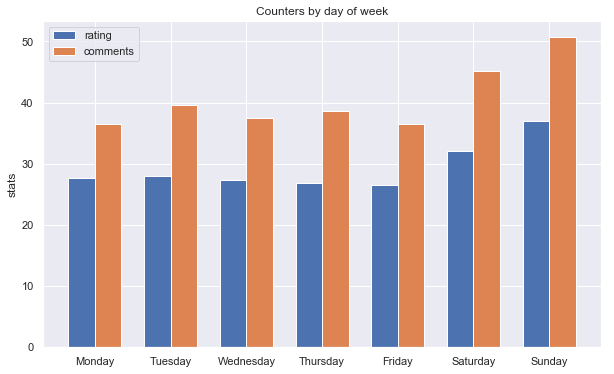

In [6]:
sample = df[['published_dayofweek', 'published_dayname', 'rating', 'comments', 'views']].groupby(['published_dayofweek', 'published_dayname']).agg('mean').reset_index()
width = 0.35
x = np.arange(len(sample))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sample['rating'], width, label='rating')
rects2 = ax.bar(x + width/2, sample['comments'], width, label='comments')
ax.set_ylabel('stats')
ax.set_title('Counters by day of week')
ax.set_xticks(x)
ax.set_xticklabels(sample['published_dayname'])
ax.legend()
plt.show()

#### Counters by hour

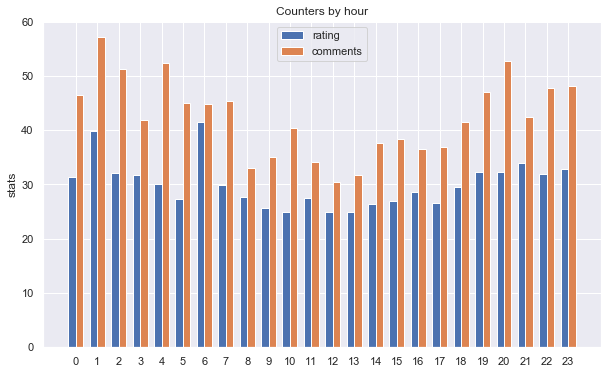

In [7]:
sample = df[['published_hour', 'rating', 'comments', 'views']].groupby(['published_hour']).agg('mean').reset_index()
width = 0.35
x = np.arange(len(sample))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sample['rating'], width, label='rating')
rects2 = ax.bar(x + width/2, sample['comments'], width, label='comments')
ax.set_ylabel('stats')
ax.set_title('Counters by hour')
ax.set_xticks(x)
ax.set_xticklabels(sample['published_hour'])
ax.legend()
plt.show()

#### Counters by year

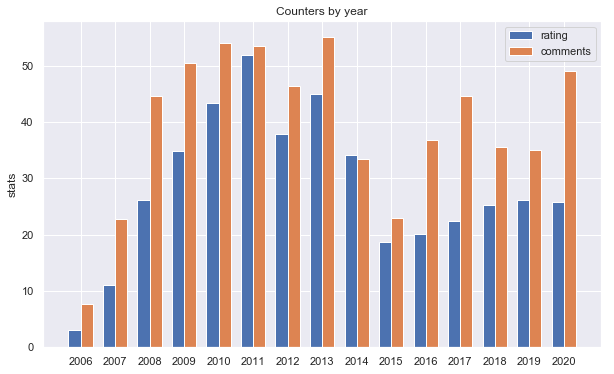

In [8]:
sample = df[['published_year', 'rating', 'comments']].groupby(['published_year']).agg('mean').reset_index()
width = 0.35
x = np.arange(len(sample))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sample['rating'], width, label='rating')
rects2 = ax.bar(x + width/2, sample['comments'], width, label='comments')
ax.set_ylabel('stats')
ax.set_title('Counters by year')
ax.set_xticks(x)
ax.set_xticklabels(sample['published_year'])
ax.legend()
plt.show()

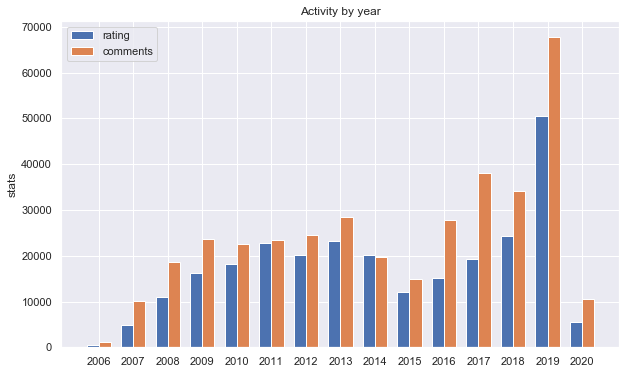

In [9]:
# it's some approx, because it doesn't contain all articles
sample = df[['published_year', 'rating', 'comments']].groupby(['published_year']).agg('sum').reset_index()
width = 0.35
x = np.arange(len(sample))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sample['rating'], width, label='rating')
rects2 = ax.bar(x + width/2, sample['comments'], width, label='comments')
ax.set_ylabel('stats')
ax.set_title('Activity by year')
ax.set_xticks(x)
ax.set_xticklabels(sample['published_year'])
ax.legend()
plt.show()

#### Most common categories

In [10]:
from collections import Counter

In [11]:
c = Counter(', '.join(list(df['article_categories'][~df['article_categories'].isnull()])).split(', '))
most_common_article_categs = c.most_common(10)
most_common_article_categs

[('f_develop', 4945),
 ('f_popsci', 2849),
 ('f_management', 1129),
 ('f_admin', 1096),
 ('h_programming', 788),
 ('h_webdev', 681),
 ('h_closet', 640),
 ('h_infosecurity', 489),
 ('f_marketing', 451),
 ('h_javascript', 403)]

#### Most common tags

In [12]:
c = Counter(', '.join(list(df['tags'][~df['tags'].isnull()])).split(', '))
most_common_tags = c.most_common(10)
most_common_tags

[('javascript', 266),
 ('java', 201),
 ('разработка', 178),
 ('python', 161),
 ('программирование', 161),
 ('android', 159),
 ('php', 150),
 ('linux', 141),
 ('google', 126),
 ('open source', 114)]

#### Views distribution. Supposed to be ~lognormal

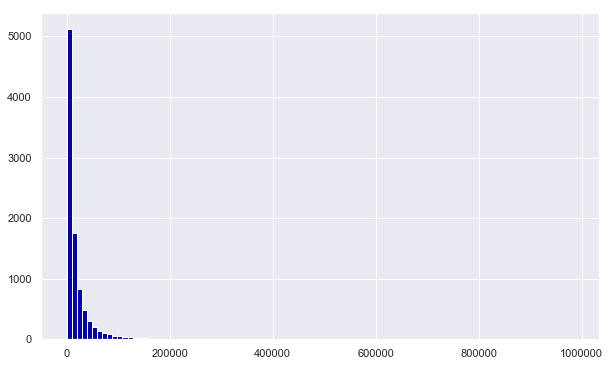

In [13]:
plt.hist(df['views'], bins=100, color='#0504aa')
plt.show()

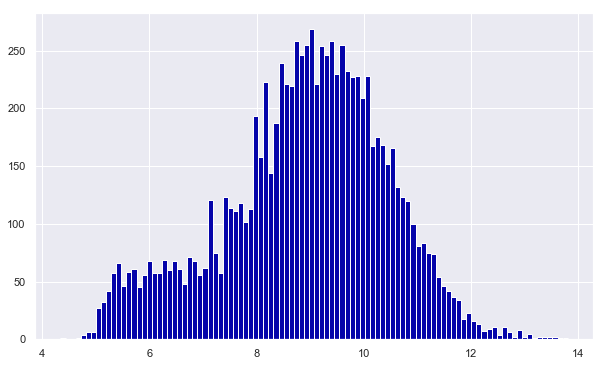

In [14]:
plt.hist(np.log(df['views']+1), bins=100, color='#0504aa')
plt.show()

#### Article lengths

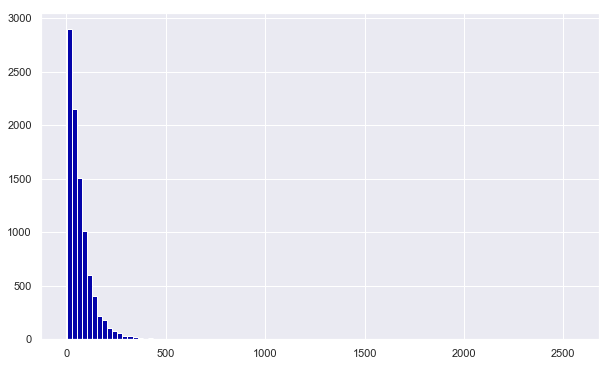

In [15]:
plt.hist(df['sentences_count'], bins=100, color='#0504aa')
plt.show()

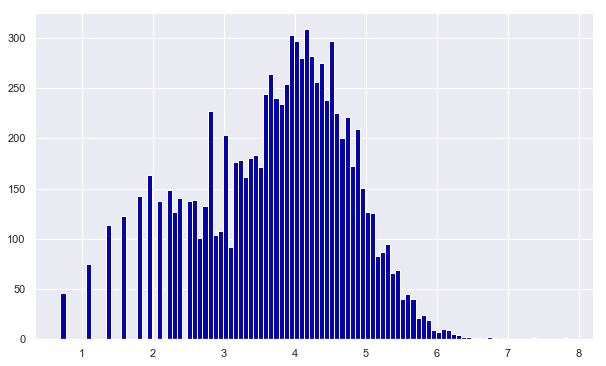

In [16]:
plt.hist(np.log(df['sentences_count']+1), bins=100, color='#0504aa')
plt.show()

#### Is there a dependency between an article length and rating (define a new rating as: positive / (positive+negative))

In [17]:
df_sample = df[(df['positive_votes'] + df['negative_votes']) > 10].copy()
print(len(df_sample))
df_sample['rating_2'] = df_sample['positive_votes'] / (df_sample['positive_votes'] + df_sample['negative_votes'])

7720


#### Check if a new rating correlates with dayofweek

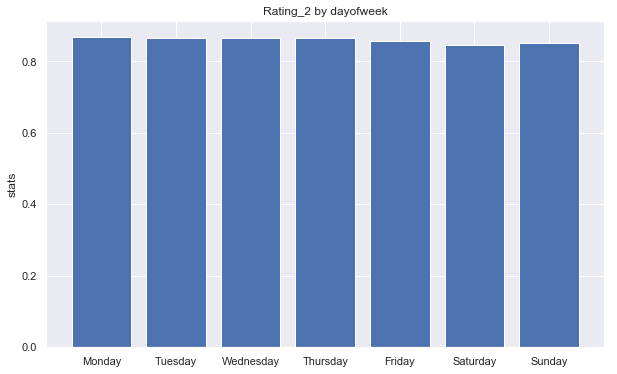

In [18]:
sample = df_sample[['published_dayofweek', 'published_dayname', 'rating_2']].groupby(['published_dayofweek', 'published_dayname']).agg('mean').reset_index()
plt.bar(range(len(sample)), sample['rating_2'])
plt.xticks(range(len(sample)), sample['published_dayname'])
plt.title('Rating_2 by dayofweek')
plt.ylabel('stats')
plt.show()

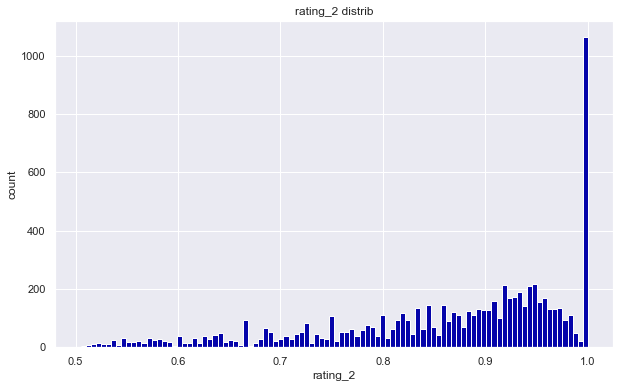

In [19]:
plt.hist(df_sample['rating_2'], bins=100, color='#0504aa')
plt.title('rating_2 distrib')
plt.xlabel('rating_2')
plt.ylabel('count')
plt.show()

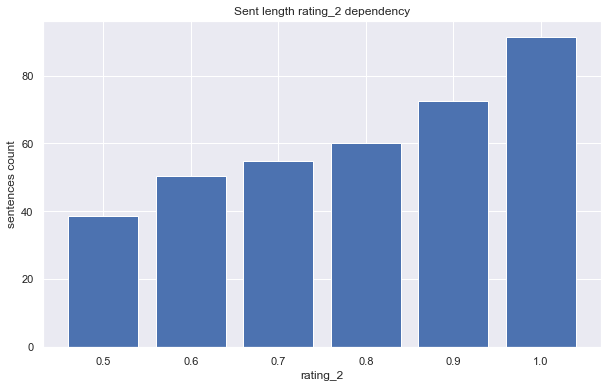

In [20]:
df_sample['rating_2_round'] = df_sample['rating_2'].apply(lambda x: round(x*10)/10)
sample = df_sample[['rating_2_round', 'sentences_count']].groupby('rating_2_round').agg('mean').reset_index()

plt.bar(range(len(sample)), sample['sentences_count'])
plt.xticks(range(len(sample)), sample['rating_2_round'])
plt.title('Sent length rating_2 dependency')
plt.xlabel('rating_2')
plt.ylabel('sentences count')
plt.show()

#### Of course there is a correlation between rating and how long article is

#### Let's build a model to predict this 'normalized' rating (but there is still a room to normalize it (through time, for example)

In [21]:
most_common_article_categs = set([x[0] for x in most_common_article_categs])
most_common_tags = set([x[0] for x in most_common_tags])
most_common_article_categs, most_common_tags

({'f_admin',
  'f_develop',
  'f_management',
  'f_marketing',
  'f_popsci',
  'h_closet',
  'h_infosecurity',
  'h_javascript',
  'h_programming',
  'h_webdev'},
 {'android',
  'google',
  'java',
  'javascript',
  'linux',
  'open source',
  'php',
  'python',
  'программирование',
  'разработка'})

In [22]:
def is_article_categ_most_common(article_categ_line):
    if pd.isnull(article_categ_line):
        return 0
    categs = article_categ_line.split(', ')
    return int(any([categ in most_common_article_categs for categ in categs]))

def is_tag_most_common(tags_line):
    if pd.isnull(tags_line):
        return 0
    tags = tags_line.split(', ')
    return int(any([tag in most_common_tags for tag in tags]))

In [122]:
df_sample['title_len'] = df_sample['title'].apply(len)
df_sample['article_categ_cnt'] = df_sample['article_categories'].apply(lambda x: x.count(',') if pd.notnull(x) else 0)
df_sample['tags_cnt'] = df_sample['tags'].apply(lambda x: x.count(',') if pd.notnull(x) else 0)
df_sample['weekend'] = df_sample['published_dayofweek'].apply(lambda x: int(x in [5, 6]))
df_sample['most_common_article_categ'] = df_sample['article_categories'].apply(is_article_categ_most_common)
df_sample['most_common_tag'] = df_sample['tags'].apply(is_tag_most_common)
df_sample['weight'] = df_sample['negative_votes'] + df_sample['positive_votes']

In [123]:
features = [
    'title_len', 'article_categ_cnt', 'href_count', 'img_count', 'tags_cnt', 'h3_count',
    'i_count', 'spoiler_count', 'text_len', 'lines_count', 'sentences_count',
    'max_sentence_len', 'min_sentence_len', 'mean_sentence_len', 'median_sentence_len',
    'tokens_count', 'max_token_len', 'mean_token_len', 'median_token_len',
    'alphabetic_tokens_count', 'words_count', 'words_mean', 'published_dayofweek',
    'published_hour', 'weekend', 'most_common_article_categ', 'most_common_tag',
    'weight'
]

y = df_sample['rating_2']
X = df_sample[features]
y.shape, X.shape

((7720,), (7720, 28))

#### target distribution

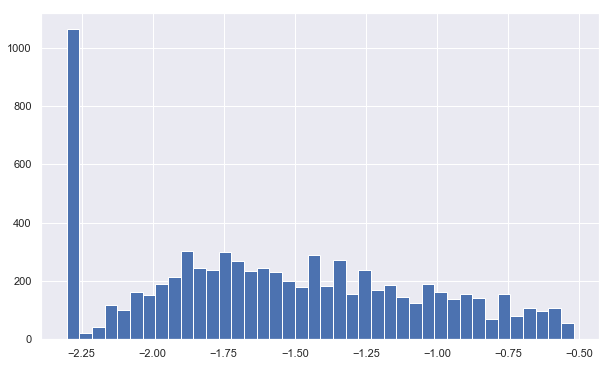

In [124]:
plt.hist(np.log(1.1-y), bins=40)
plt.show()

#### Translations
1. target = log(1.1 - rating)
2. rating = 1.1 - exp(target)

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_weights = X_train['weight']
X_train.drop(['weight'], axis=1, inplace=True)
X_test.drop(['weight'], axis=1, inplace=True)

In [127]:
import lightgbm as lgb

In [145]:
gbm = lgb.LGBMRegressor(num_leaves=31, learning_rate=0.04, n_estimators=100)

gbm.fit(X_train, np.log(1.1 - y_train),
        sample_weight=train_weights,
        eval_set=[(X_test, np.log(1.1 - y_test))],
        eval_metric='l2', early_stopping_rounds=20)
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

[1]	valid_0's l2: 0.243591
Training until validation scores don't improve for 20 rounds
[2]	valid_0's l2: 0.241776
[3]	valid_0's l2: 0.24
[4]	valid_0's l2: 0.238597
[5]	valid_0's l2: 0.237154
[6]	valid_0's l2: 0.235945
[7]	valid_0's l2: 0.234552
[8]	valid_0's l2: 0.233308
[9]	valid_0's l2: 0.232072
[10]	valid_0's l2: 0.230865
[11]	valid_0's l2: 0.229805
[12]	valid_0's l2: 0.228963
[13]	valid_0's l2: 0.228284
[14]	valid_0's l2: 0.227423
[15]	valid_0's l2: 0.226769
[16]	valid_0's l2: 0.226095
[17]	valid_0's l2: 0.225403
[18]	valid_0's l2: 0.224841
[19]	valid_0's l2: 0.224206
[20]	valid_0's l2: 0.223824
[21]	valid_0's l2: 0.223494
[22]	valid_0's l2: 0.223285
[23]	valid_0's l2: 0.222929
[24]	valid_0's l2: 0.222634
[25]	valid_0's l2: 0.222139
[26]	valid_0's l2: 0.221713
[27]	valid_0's l2: 0.221361
[28]	valid_0's l2: 0.221093
[29]	valid_0's l2: 0.220867
[30]	valid_0's l2: 0.220702
[31]	valid_0's l2: 0.220473
[32]	valid_0's l2: 0.220365
[33]	valid_0's l2: 0.220066
[34]	valid_0's l2: 0.219769


In [137]:
gbm.feature_importances_

array([114,  94, 101,  65,  53,  11,  24,   8,  25,  64,  50,  65,  26,
        62,  39,  22,  32,  70,   6,  20,  18,  66,  16,  38,   0,  12,
         9], dtype=int32)

In [146]:
mean_squared_error(y_test, 1.1 - np.exp(y_pred)) ** 0.5

0.11880053790993857

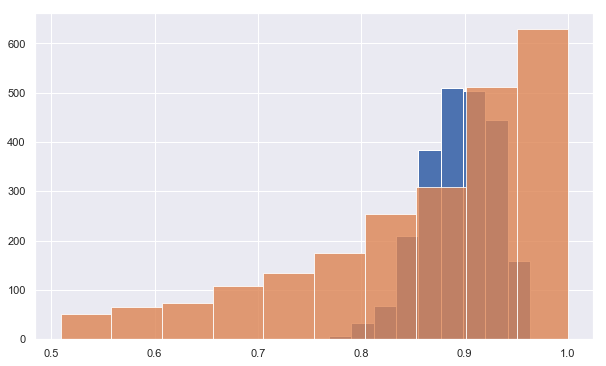

In [147]:
plt.hist(1.1 - np.exp(y_pred), bins=10, label='pred')
plt.hist(y_test, bins=10, label='true', alpha=0.8)
plt.show()

In [140]:
np.corrcoef(y_test, 1.1 - np.exp(y_pred))

array([[1.        , 0.31555309],
       [0.31555309, 1.        ]])

In [141]:
sample = X_test.copy()
sample['pred'] = y_pred
sample = sample.sort_values('pred')

In [149]:
articles_cnt = 10
best_articles = [row for _, row in df_sample.loc[list(sample.index[:articles_cnt])].iterrows()]
worst_articles = [row for _, row in df_sample.loc[list(sample.index[-articles_cnt:])].iterrows()]

print('best articles')
for article in best_articles:
    print(f'    {article["title"]}  {article["positive_votes"]}  {article["negative_votes"]}\n    {article["rating_2"]}\n    {article["link"]}')
print('worst articles')
for article in worst_articles:
    print(f'    {article["title"]}  {article["positive_votes"]}  {article["negative_votes"]}\n    {article["rating_2"]}\n    {article["link"]}')

best articles
    Локализация по Aruco маркерам  14  0
    1.0
    https://habr.com/ru/post/482220/
    Вечная классика: чему современным экшен-играм стоит поучиться у DOOM  53  4
    0.9298245614035088
    https://habr.com/ru/company/playgendary/blog/477584/
    Панель мониторинга Grafana для пивной системы BeerTender  22  1
    0.9565217391304348
    https://habr.com/ru/company/itsumma/blog/477870/
    Конференция Velocity London от O'Reilly: обзор и слайды  36  0
    1.0
    https://habr.com/ru/company/badoo/blog/429982/
    GitLab Shell Runner. Конкурентный запуск тестируемых сервисов при помощи Docker Compose  16  1
    0.9411764705882353
    https://habr.com/ru/post/449910/
    Давайте быстрокодить как профессионалы  31  8
    0.7948717948717948
    https://habr.com/ru/post/484930/
    Сети для самых маленьких. Часть седьмая. VPN  118  0
    1.0
    https://habr.com/ru/post/170895/
    Логи в Kubernetes (и не только) сегодня: ожидания и реальность  39  0
    1.0
    https://habr.

#### Although the model is weak, it can help to find more serious and thoughtful articles